In [1]:
import sqlite3

# Connect to (or create) the database file
conn = sqlite3.connect("sales_datab.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
cursor.executescript("""
INSERT INTO sales (product, quantity, price) VALUES ('Apple', 10, 2.5);
INSERT INTO sales (product, quantity, price) VALUES ('Banana', 5, 1.0);
INSERT INTO sales (product, quantity, price) VALUES ('Orange', 8, 1.75);
INSERT INTO sales (product, quantity, price) VALUES ('Apple', 3, 2.5);
INSERT INTO sales (product, quantity, price) VALUES ('Banana', 6, 1.0);
INSERT INTO sales (product, quantity, price) VALUES ('Orange', 2, 1.75);
""")

conn.commit()
conn.close()


In [2]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("sales_datab.db")

# Load the sales table
df = pd.read_sql_query("SELECT * FROM sales", conn)

# Display data
print(df)

conn.close()


  product  quantity  price
0   Apple        10   2.50
1  Banana         5   1.00
2  Orange         8   1.75
3   Apple         3   2.50
4  Banana         6   1.00
5  Orange         2   1.75


In [12]:
import sqlite3
import pandas as pd

# Connect to the SQLite database file
conn = sqlite3.connect("sales_datab.db")

# Query 1: Total quantity and revenue by product
q1 = pd.read_sql_query("""
    SELECT 
        product,
        SUM(quantity) AS total_quantity,
        SUM(quantity * price) AS total_revenue
    FROM sales
    GROUP BY product;
""", conn)
print("\n1. Total quantity and revenue by product:")
print(q1)

# Query 2: Product with the highest revenue
q2 = pd.read_sql_query("""
    SELECT 
        product,
        SUM(quantity * price) AS total_revenue
    FROM sales
    GROUP BY product
    ORDER BY total_revenue DESC
    LIMIT 1;
""", conn)
print("\n2. Product with highest revenue:")
print(q2)

# Query 3: Total revenue overall
q3 = pd.read_sql_query("""
    SELECT 
        SUM(quantity * price) AS total_revenue_all
    FROM sales;
""", conn)
print("\n3. Total revenue of all products combined:")
print(q3)

# Query 4: Average quantity per transaction
q4 = pd.read_sql_query("""
    SELECT 
        AVG(quantity) AS avg_quantity_per_transaction
    FROM sales;
""", conn)
print("\n4. Average quantity per transaction:")
print(q4)

# Query 5: Number of sales per product
q5 = pd.read_sql_query("""
    SELECT 
        product,
        COUNT(*) AS transactions
    FROM sales
    GROUP BY product;
""", conn)
print("\n5. Number of sales (transactions) per product:")
print(q5)

# 6. Total quantity sold overall
q6 = pd.read_sql_query("""
    SELECT SUM(quantity) AS total_quantity_all FROM sales;
""", conn)
print("\n6. Total quantity of all products:")
print(q6)

# 7. Average revenue per transaction
q7 = pd.read_sql_query("""
    SELECT AVG(quantity * price) AS avg_revenue_per_transaction FROM sales;
""", conn)
print("\n7. Average revenue per transaction:")
print(q7)

# 8. Min and Max quantity per product
q8 = pd.read_sql_query("""
    SELECT 
        product,
        MIN(quantity) AS min_quantity,
        MAX(quantity) AS max_quantity
    FROM sales
    GROUP BY product;
""", conn)
print("\n8. Min and Max quantity per product:")
print(q8)

# 9. Revenue per transaction (row)
q9 = pd.read_sql_query("""
    SELECT 
        rowid AS transaction_id,
        product,
        quantity,
        price,
        (quantity * price) AS revenue
    FROM sales;
""", conn)
print("\n9. Revenue per transaction:")
print(q9)


1. Total quantity and revenue by product:
  product  total_quantity  total_revenue
0   Apple              13           32.5
1  Banana              11           11.0
2  Orange              10           17.5

2. Product with highest revenue:
  product  total_revenue
0   Apple           32.5

3. Total revenue of all products combined:
   total_revenue_all
0               61.0

4. Average quantity per transaction:
   avg_quantity_per_transaction
0                      5.666667

5. Number of sales (transactions) per product:
  product  transactions
0   Apple             2
1  Banana             2
2  Orange             2

6. Total quantity of all products:
   total_quantity_all
0                  34

7. Average revenue per transaction:
   avg_revenue_per_transaction
0                    10.166667

8. Min and Max quantity per product:
  product  min_quantity  max_quantity
0   Apple             3            10
1  Banana             5             6
2  Orange             2             8

9. Reve

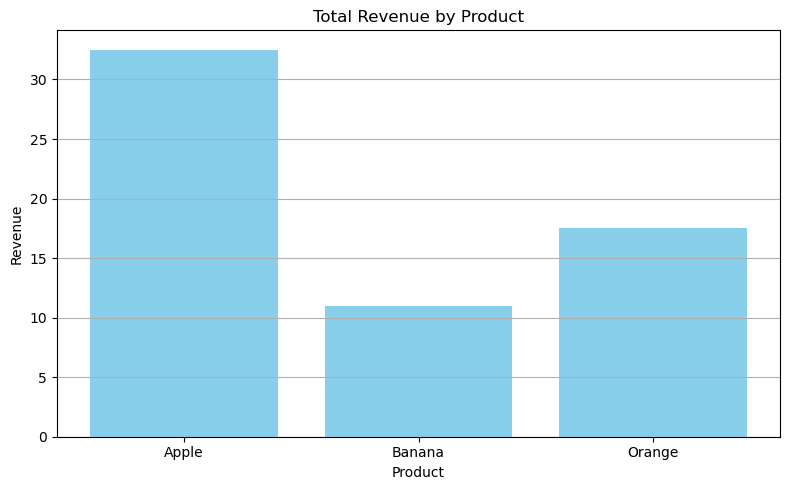

In [11]:
import matplotlib.pyplot as plt

# Query revenue per product
revenue_data = pd.read_sql_query("""
    SELECT product, SUM(quantity * price) AS total_revenue
    FROM sales
    GROUP BY product;
""", conn)

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(revenue_data['product'], revenue_data['total_revenue'], color='skyblue')
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


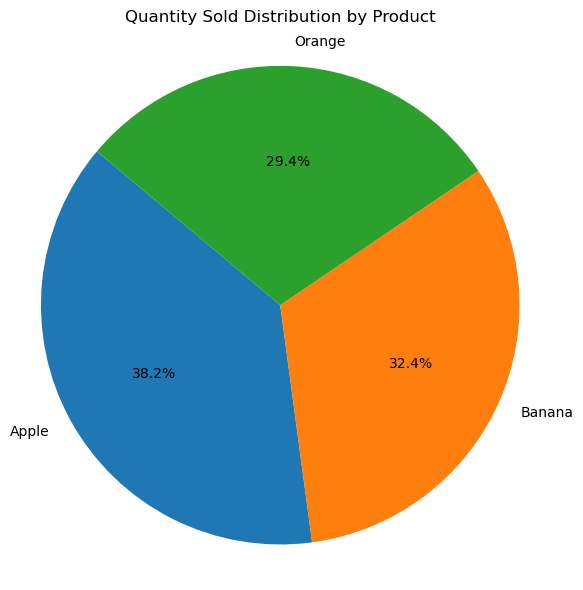

In [13]:
# B. Pie chart of quantity sold by product
plt.figure(figsize=(6, 6))
plt.pie(q1['total_quantity'], labels=q1['product'], autopct='%1.1f%%', startangle=140)
plt.title("Quantity Sold Distribution by Product")
plt.axis('equal')
plt.tight_layout()
plt.show()

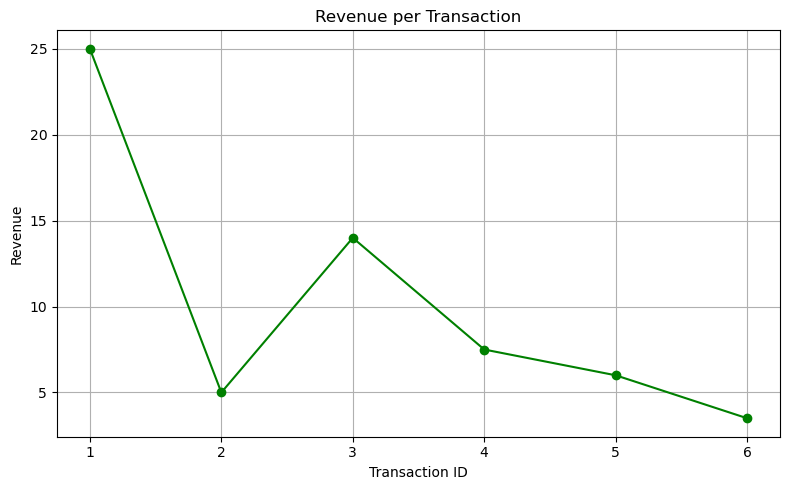

In [14]:
# C. Line chart of revenue per transaction
rev_per_txn = pd.read_sql_query("""
    SELECT rowid AS transaction_id, (quantity * price) AS revenue
    FROM sales;
""", conn)

plt.figure(figsize=(8, 5))
plt.plot(rev_per_txn['transaction_id'], rev_per_txn['revenue'], marker='o', linestyle='-', color='green')
plt.title("Revenue per Transaction")
plt.xlabel("Transaction ID")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()













In [16]:
#  Close the connection ONLY AFTER everything is done
conn.close()